In [2]:
import numpy as np 
import matplotlib.pyplot as plt

    Se ha muestreado un período de una señal de t-continuo y se ha obtenido la siguiente secuencia x(n) de 8 muestras que se muestra en la figura.

    1. ¿Cuál es la frecuencia de muestreo?
    2. ¿Cuántos armónicos tiene el espectro?
    3. ¿A qué frecuencia corresponden esos armónicos?
    4. Reconstruya 5 ciclos de la señal en el dominio de t-continuo.


- - -

### Apartado 1

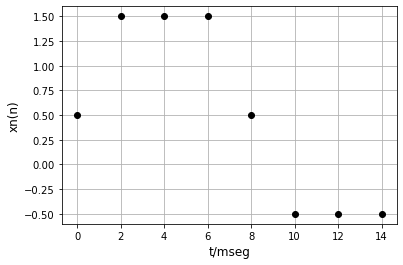

In [3]:
xn = np.array ([0.50,1.50,1.50,1.50,0.50,-0.50,-0.50,-0.50])
n = np.arange (0,16,2)

plt.plot(n,xn,'ko')
plt.grid (True)
plt.xticks(np.arange(0,16,2))
plt.xlabel('t/mseg',fontsize=12)
plt.ylabel('xn(n)',fontsize=12)
plt.show()

In [4]:
Ts = 2
print (f"El período de la señal es: {Ts} mseg. Porque tenemos 1 muestra por cada 2 mseg.") 
print (f"Por lo tanto, la frencuencia de muestreo es Fs = {1/(Ts*10**-3)} Hz.")

El período de la señal es: 2 mseg. Porque tenemos 1 muestra por cada 2 mseg.
Por lo tanto, la frencuencia de muestreo es Fs = 500.0 Hz.


- - -

### Apartado 2 y 3

In [5]:
from scipy.fftpack import fft, fftfreq

In [10]:
N = 8
Fs = 1/(Ts*10**-3)
armonicos = np.array ([0,1,2,3,4])*Fs/N
armonicos

array([  0. ,  62.5, 125. , 187.5, 250. ])

Las frecuencias correspondientes a los armónicos son: [  0.   62.5 125.  187.5 250.  312.5 375.  437.5 500. ]


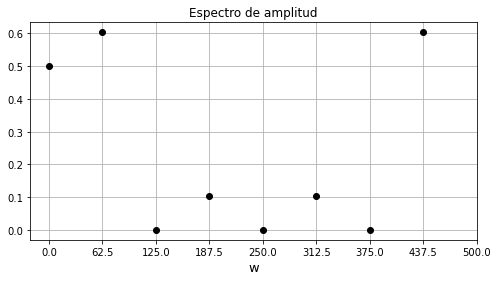

In [28]:
Fs = 500
H = fft (xn) / N #normalizamos
p = np.arange (len(H))
print (f"Las frecuencias correspondientes a los armónicos son: {np.array ([0,1,2,3,4,5,6,7,8])*Fs/N}")

plt.figure(figsize=(8,4))
plt.plot(p*Fs/N,abs(H),"ko") #frecuencia en Hz
plt.xlabel('w', fontsize=13)
plt.title('Espectro de amplitud')
plt.grid(True)
plt.xticks (np.array ([0,1,2,3,4,5,6,7,8])*Fs/N)
plt.show()

#### El espectro tiene 8/2 + 1 = 5 armónicos (frecuencia entre 0 y Fs2)

- - - 

### Apartado 4

In [30]:
import import_ipynb
from FTransformaciones_tiempo_frecuencia import Espectro, señal #periodicas

importing Jupyter notebook from FTransformaciones_tiempo_frecuencia.ipynb


/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


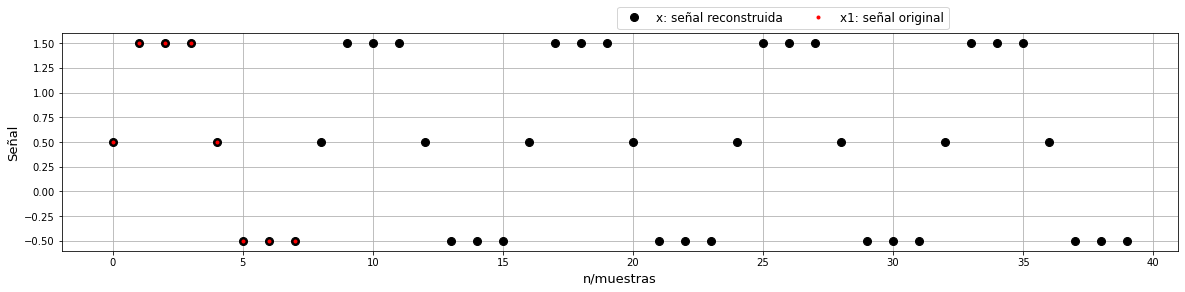

In [31]:
N1 = 8
nx1 = np.arange(40) #Multiplo entero del N, 10 puntos por ciclo 
x_1 = np.zeros(len(nx1),dtype=complex)
s1 = 0

c1 = Espectro(xn)
p1 = np.arange(N1)

for i in np.arange(N1): #Para hacer la sumatoria
    s1 = s1 + c1[i]*np.exp(2j*np.pi*i*nx1/N1)
x_1 = s1


plt.figure(figsize=(20,4))
plt.plot(nx1,x_1,'ok',ms=8)
plt.plot(n/2,xn,'ro',ms=3)
plt.xlabel('n/muestras', fontsize=13)
plt.ylabel('Señal', fontsize=13)
plt.legend(('x: señal reconstruida','x1: señal original'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.grid(True)
plt.show()

In [32]:
from FReconstrucciondeseñalesapartirdemuestras import h

importing Jupyter notebook from FReconstrucciondeseñalesapartirdemuestras.ipynb


<string>:10: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


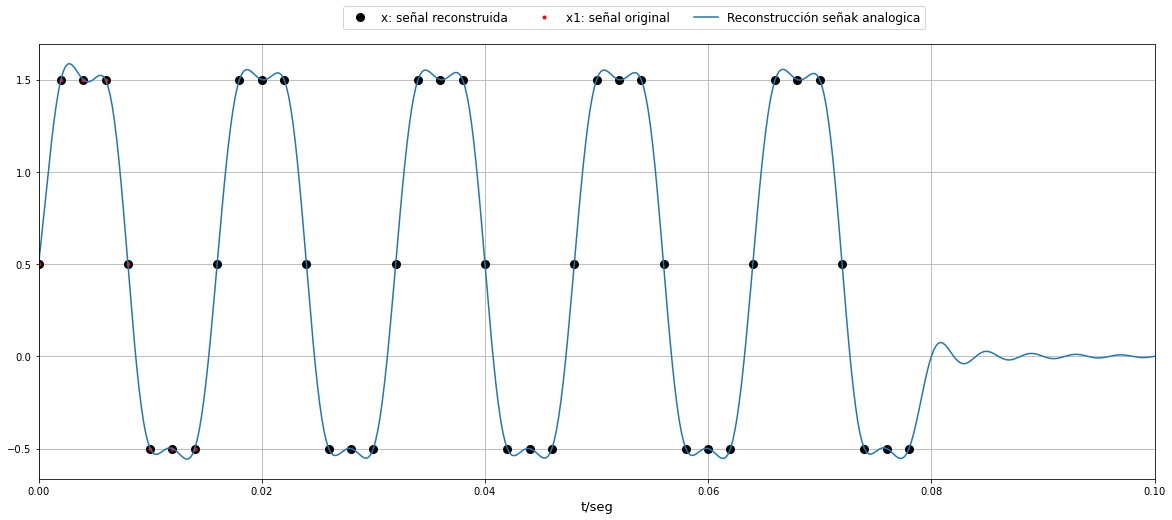

In [34]:
w1 = h(2000,5000,x_1,Fs) #Reconstruyo la señal analógica a partir de sus muestras
t1 = np.arange(len(w1))/5000


plt.figure(figsize=(20,8))
plt.plot(nx1/Fs,x_1,'ok',ms=8)
plt.plot((n/2)/Fs,xn,'ro',ms=3)
plt.plot(t1,w1)
plt.xlabel('t/seg', fontsize=13)
plt.legend(('x: señal reconstruida','x1: señal original','Reconstrucción señak analogica'),prop={'size':12},bbox_to_anchor=(0.8,1.10),ncol=4)
plt.grid(True)
plt.xlim (0,0.10)
plt.show()

- - -